<a href="https://colab.research.google.com/github/Souvikta97/DeepLearning/blob/master/fastai_Lesson1_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Dataset Image Recognition for fast.ai

Tutorial on visualizing
https://nik-hil.github.io/2019/05/22/Visualizing-model-training.html

Hyperparameters: bs=64;

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64  #Batch Size

#Loading and Exploring Data

In [47]:
path = untar_data(URLs.MNIST_SAMPLE);path

PosixPath('/root/.fastai/data/mnist_sample')

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

In [0]:
df = pd.read_csv(path/'labels.csv')

In [0]:
#Loading Data from CSV : Method 1
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_csv(path,csv_labels='labels.csv',ds_tfms=tfms,size=28)

In [0]:
#Loading Data from folders : Method 2
tfms=get_transforms(do_flip=False)
ImageDataBunch.from_folder(path,ds_tfms=tfms,size=28);

get_transforms very important function

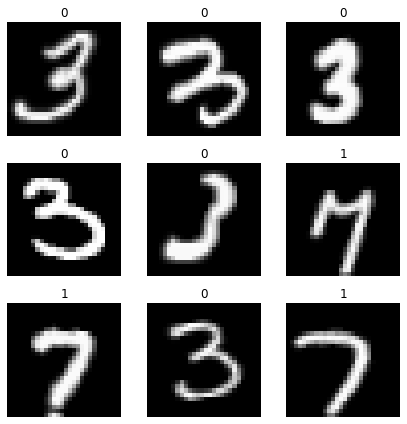

In [64]:
data.show_batch(rows=3,figsize=(6,6))

In [13]:
data.classes

[0, 1]

#Training with Resnet 34

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate,callback_fns=ShowGraph)

In [0]:
doc(cnn_learner)

In [0]:
print(learn.model)

epoch,train_loss,valid_loss,error_rate,time
0,0.295494,0.136372,0.044699,00:15
1,0.165391,0.079222,0.028760,00:15
2,0.115795,0.048334,0.018018,00:15
3,0.067661,0.034538,0.012474,00:15
4,0.055535,0.025244,0.009009,00:15
5,0.049566,0.027490,0.007970,00:15
6,0.044079,0.018892,0.004851,00:15
7,0.041108,0.018814,0.006237,00:15


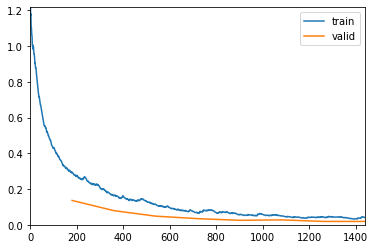

In [51]:
learn.fit_one_cycle(8)

In [0]:
learn.save('res34cycle1')

#Training:Resnet 18

In [0]:
learn= cnn_learner(data,models.resnet18,metrics=error_rate,callback_fns=ShowGraph)

In [0]:
learn.model

epoch,train_loss,valid_loss,error_rate,time
0,0.378698,0.224397,0.081081,00:13
1,0.210177,0.153455,0.051629,00:13
2,0.136806,0.087376,0.032571,00:13
3,0.099531,0.067993,0.023562,00:13
4,0.067184,0.050221,0.018018,00:13
5,0.061257,0.041086,0.016286,00:13
6,0.053712,0.037801,0.013167,00:13
7,0.044699,0.037347,0.012821,00:13


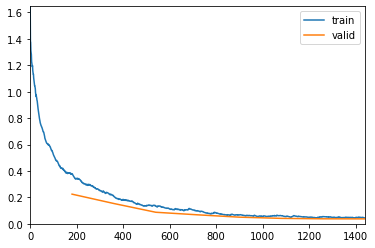

In [71]:
learn.fit_one_cycle(8)

In [0]:
learn.save('Res18cycle1')

#Results

In [79]:
#Understand this Block
interp= ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

In [33]:
preds,y,losses=learn.get_preds(with_loss=True) #Understand

In [0]:
learn.show_results()

In [0]:
doc(ClassificationInterpretation)

In [0]:
interp.plot_top_losses(9)

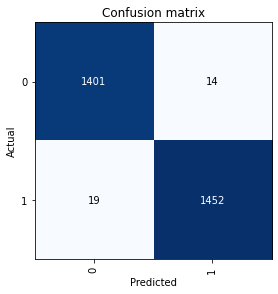

In [80]:
interp.plot_confusion_matrix()

#Unfreezing and training

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

In [0]:
learn.load('Cycle 1');

In [76]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


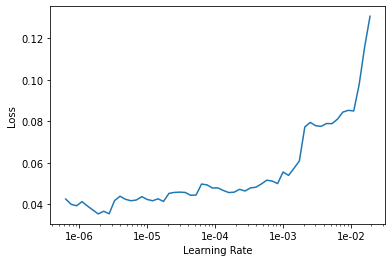

In [77]:
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.049329,0.031903,0.010742,00:14
1,0.041017,0.032002,0.011435,00:14


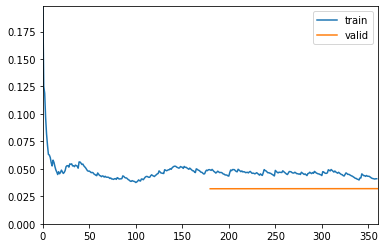

In [78]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))